In [1]:
import numpy as np
from datetime import datetime, timedelta
from netCDF4 import Dataset

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from metpy.units import units

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [13]:
data = Dataset('ECMWF_ERA-40_subset.nc','r')
    
#analyze the variables and plot (on a map) SLP, 10-m winds, and total precipitation

lat = data.variables["latitude"][:]
lon= data.variables["longitude"][:]
time= data.variables["time"][:] # hours since 1900-01-01 00:00:0.0


startTime = datetime(1900,1,1,0,0)

dts = np.empty(len(time),dtype = datetime)
for index, t in enumerate(time):
    dts[index] = startTime + timedelta(hours =int(t))


tp= data.variables["tp"][:]*1000
p10u= data.variables["p10u"][:] 
p10u = p10u *units("m/s").to("knots")


p10v= data.variables["p10v"][:]
p10v= p10v *units("m/s").to("knots")
msl= data.variables["msl"][:]/100

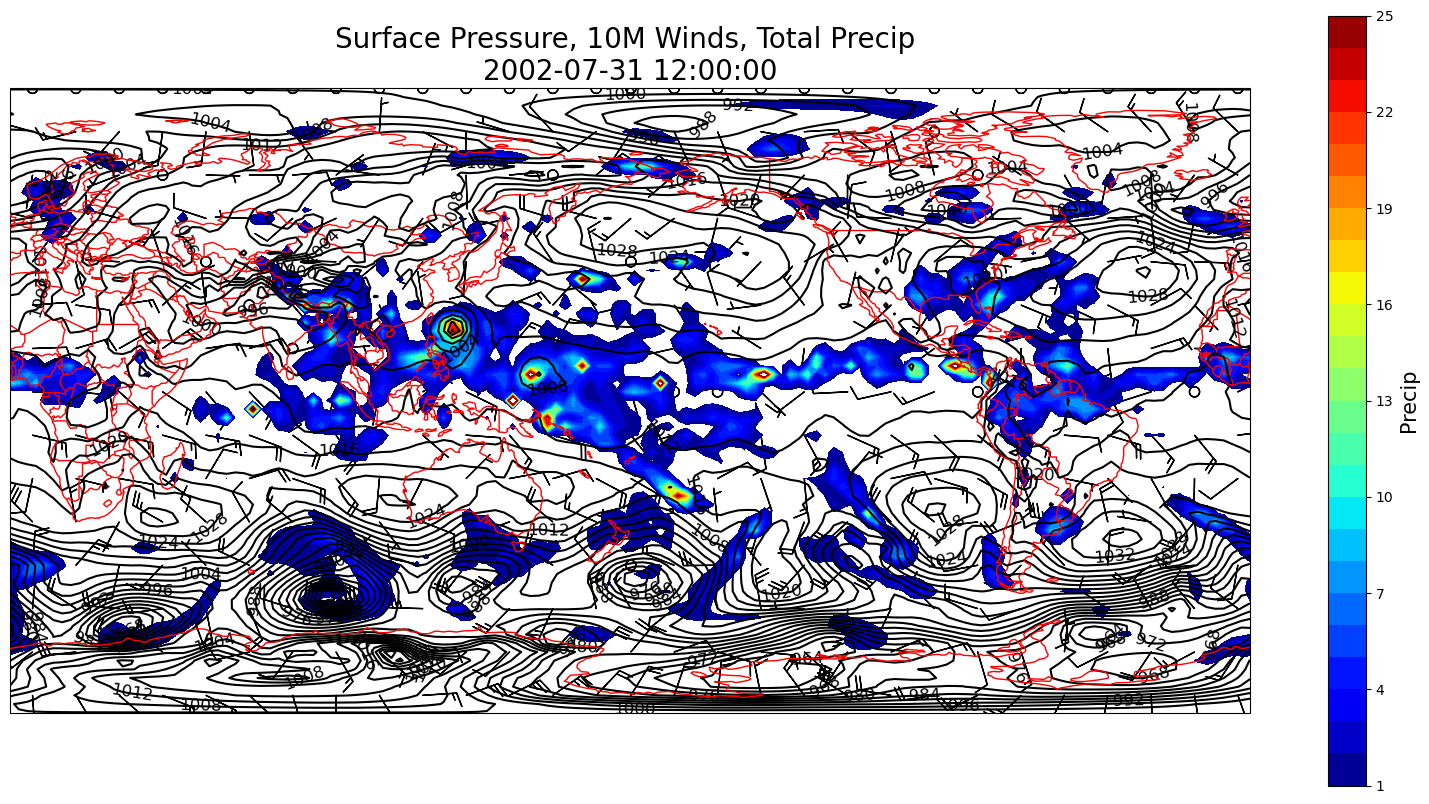

In [14]:
figure = plt.figure(figsize = (20,10))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude = -181))
#ax.set_extent((-180,180,90,-90))
clevs = np.arange(900,1200,4)

cs = plt.contour(lon, lat, msl[2],clevs, colors = "black",transform = ccrs.PlateCarree())

plt.barbs(lon[::5],lat[::5], p10u[0,::5,::5], p10v[0,::5,::5],length=7)



ax.clabel(cs,inline = 1, fontsize =12)




plt.contourf (lon, lat, tp[3], list(range(1,26)),cmap = "jet", transform = ccrs.PlateCarree())
ax.coastlines(zorder = 4, color = "red")
ax.add_feature(cfeature.BORDERS, edgecolor = "red")
cb = plt.colorbar()
cb.set_label("Precip", fontsize = 15)
plt.title("Surface Pressure, 10M Winds, Total Precip \n"+str(dts[60]), fontsize = 20)
plt.show()
